In [113]:
import numpy as np
import matplotlib.pyplot as plt

In [114]:
def explicit_euler(x_end, h, x0, y0, f):
    xs = np.arange(x0, x_end + 1/2 * h, h, dtype=float)
    ys = np.zeros_like(xs, dtype=float)
    ys[0] = y0

    for i, x in enumerate(xs[:-1]):
        y = ys[i]
        r1 = f(x, y)
        r = r1
        ys[i+1] = y + r * h

    return np.array(xs), np.array(ys)

# Example usage
$$y' = 2x / y^2$$

## CX CAS Get Analytical solution
$$deSolve(y'=2x/y^2, x, y)$$

In [115]:
f = lambda x, y: 2*x / y**2
df = lambda x, y: -4 * x / y**3
ya = lambda x: (3*x**2 + 1)**(1/3)

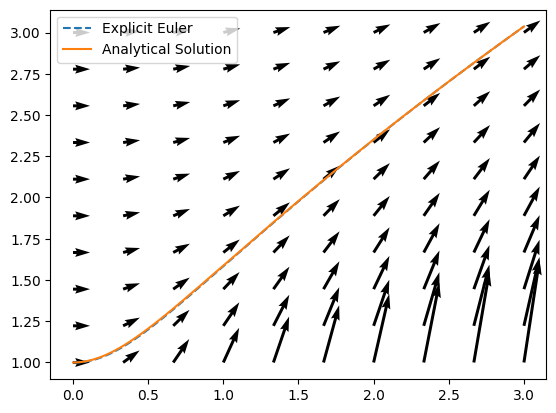

In [116]:
# explicit euler solution
x, y = explicit_euler(x_end=3, h=0.02, x0=0, y0=1, f=f)
plt.plot(x, y,'--', label="Explicit Euler")

# analytical solution
yas = ya(x)
plt.plot(x, yas, '-', label="Analytical Solution")

# quiver
qx = np.linspace(0, 3, 10)
qy = np.linspace(1, 3, 10)
xv, yv = np.meshgrid(qx, qy)
plt.quiver(xv, yv, np.ones_like(xv), f(xv, yv), angles="xy")

plt.legend()
plt.show()

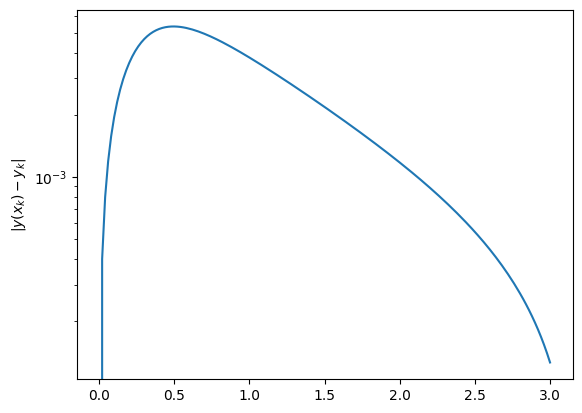

In [117]:
plt.semilogy(x, np.abs(yas-y), '-', label="Error")
plt.ylabel(r'$|y(x_k) - y_k|$')
plt.show()

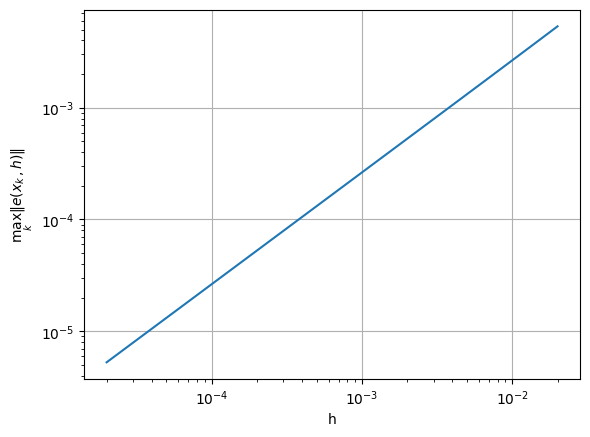

In [118]:
n = 10**np.linspace(2,5)
hs = 2/n
err = []
for h in hs:
    x, y = explicit_euler(2,h,0,1,f)
    err.append(np.linalg.norm(y-ya(x),np.inf)) # ya(x) ist die exakte Lösung

plt.loglog(hs,err,'-')
plt.xlabel('h')
plt.ylabel(r'$\max_k \|e(x_k,h)\|$')
plt.grid()
plt.show()